$y'' - ay = - sin(x)$

s.t. 

$y(0) = 0$

$y(\pi) = 0$

Заранее известное решение:

$y = \frac{sin(x)}{a+1}$

In [216]:
import numpy as np
import matplotlib.pyplot as plt

a = -0.9
def f(x):
    return np.sin(x)
def real_sol(x):
    return np.sin(x)/(a+1)

In [217]:
def fem(N = 100, a = 1):
    xs = np.linspace(0, np.pi, N+1)
    h = xs[1] - xs[0]

    def b_i_fun(i = 0):
        # return 1/6 * (-6 + a*(x[i] - x[i - 1])^2) * (x[i] - x[i - 1]) / h^2
        return (a * h**2 - 6) / (6 * h)

    def phi_i_fun(i = 0):
        # return 1/3 * (3 + a*(x[i] - x[i - 1])^2) * (x[i] - x[i - 1]) / h^2 + 1/3 * (3 + a*(x[i + 1] - x[i])^2) * (x[i + 1] - x[i]) / h^2
        return (2 * a * h**2 + 6) / (3 * h)

    def scalarA_f_phi_i(i):
        return ((xs[i-1] - xs[i]) * np.cos(xs[i]) - np.sin(xs[i-1]) + np.sin(xs[i])) / h + ((xs[i+1] - xs[i]) * np.cos(xs[i]) + np.sin(xs[i]) - np.sin(xs[i+1])) / h
    

    b_i = b_i_fun()
    phi_i = phi_i_fun()

    mtr = np.diag([phi_i for i in range(1, N)])
    for i in range(N - 2):
        mtr[i][i+1] = b_i
        mtr[i+1][i] = b_i

    target = np.array([scalarA_f_phi_i(i) for i in range(1, N)])

    y = np.concatenate(([0], np.linalg.solve(mtr, target), [0]))

    def fem_function(x):
        if x >= np.pi - 1e-7:
            return 0
        ind = int(x * N / np.pi + 1e-7)
        return (xs[ind+1] - x) / h * y[ind] + (x - xs[ind]) / h * y[ind+1]

    return fem_function


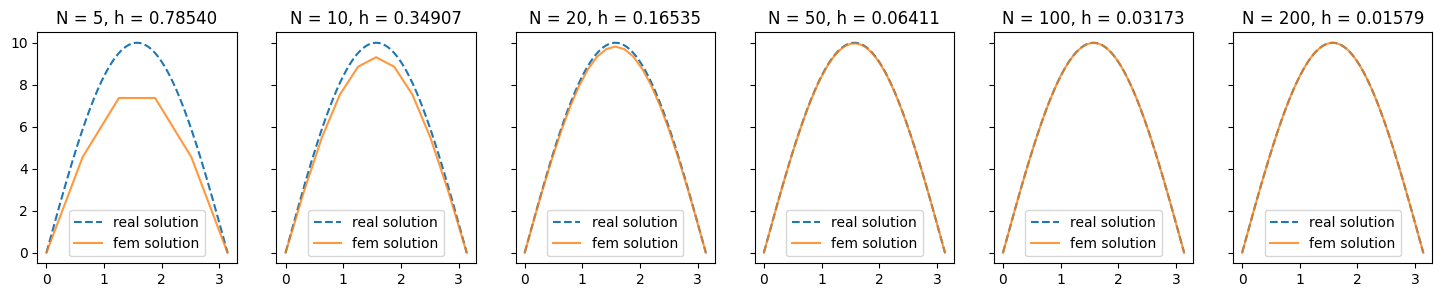

In [218]:
N_real = 10000
xs_real = np.linspace(0, np.pi, N_real)
real_values_for_draw = np.array([real_sol(x) for x in xs_real])

Ns_for_draw = (5, 10, 20, 50, 100, 200)

fig, axs = plt.subplots(nrows= 1 , ncols=len(Ns_for_draw), sharey=True, figsize=(18,3))
for i, N_fem in enumerate(Ns_for_draw):
    xs_fem = np.linspace(0, np.pi, N_fem+1)
    fem_function = fem(N_fem, a)
    fem_values_draw = [fem_function(x) for x in xs_fem]

    axs[i].plot(xs_real, real_values_for_draw, '--', label='real solution')
    axs[i].plot(xs_fem, fem_values_draw, label='fem solution', alpha=0.8)
    axs[i].title.set_text(f"N = {N_fem}, h = {(np.pi / (N_fem-1)):.5f}")
    axs[i].legend()

plt.draw()

In [219]:
Ns_for_errors_count = np.arange(3, 200)
max_errors = np.zeros(len(Ns_for_errors_count))
hs = np.zeros(len(Ns_for_errors_count))

for i, N_fem in enumerate(Ns_for_errors_count):
    xs = np.linspace(0, np.pi, N_fem+1)
    fem_function = fem(N_fem, a)
    fem_values_for_count_err = np.array([fem_function(x) for x in xs])
    real_values_for_count_err = np.array([real_sol(x) for x in xs])

    hs[i] = np.pi / N_fem
    max_errors[i] = np.max(np.abs(real_values_for_count_err - fem_values_for_count_err))

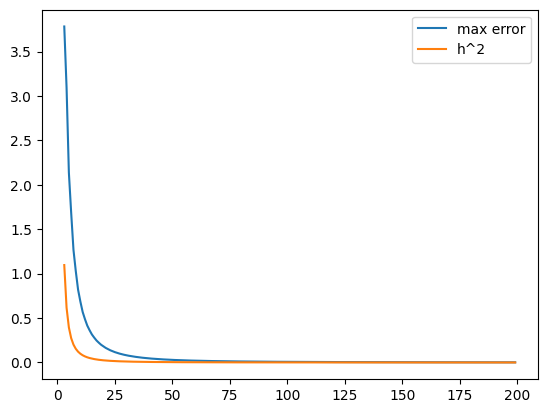

In [220]:
plt.plot(Ns_for_errors_count, max_errors, label='max error')
plt.plot(Ns_for_errors_count, hs**2, label='h^2')
plt.legend()
plt.show()

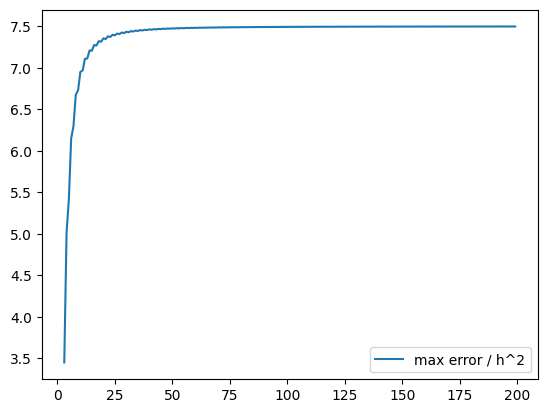

In [221]:
plt.plot(Ns_for_errors_count, max_errors / hs**2, label='max error / h^2')
plt.legend()
plt.show()

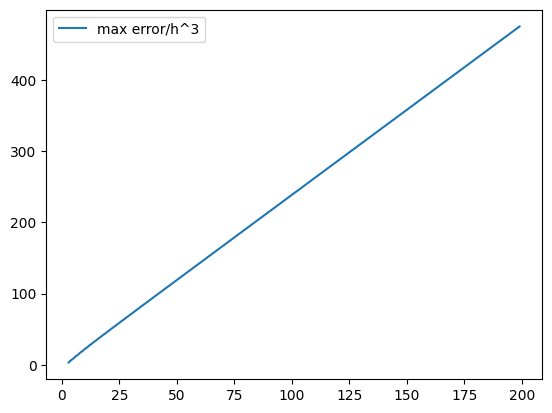

In [222]:
plt.plot(Ns_for_errors_count, max_errors / hs**3, label='max error/h^3')
plt.legend()
plt.show()

Гипотеза о сходимости, потдвердилась. $err < Ch^2$. А вот сходимости порядка куба уже нет.